# Aulas 6 e 7 - Testes de Hipótese

___
___
___

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns

___
___
___

## 1) Testes de Hipóteses

O exemplo que veremos a seguir é inspirado [neste estudo](https://psycnet.apa.org/record/1974-24190-001).

Imagine que você é o gestor de RH de uma empresa, e uma das metas de sua gestão é fazer com que não haja **discriminação de gênero** nos processos de promoção na empresa.

Mas antes de iniciar a campanha, é necessário que você responda à seguinte pergunta: **mulheres são prejudicadas em processos de promoção cuja decisão é feita por gestores homems?**

Para responder esta pergunta, você elabora o seguinte experimento:

- Pegue uma amostra aleatória de 48 gestores homens -- por exemplo, alunos de MBA de algumas faculdades;
- Peça para estes homens avaliarem um currículo de um candidato a promoções;
- Os currículos apresentados eram idênticos, mas metade deles tinham a marcação de pertencerem a mulheres, e a outra metade, de pertencerem a homens.
- Os currículos foram distribuídos aleatoriamente entre os participantes.

Para cada gestor, marcamos qual foi a decisão acerca da promoção, e o sexo indicado no currículo.

Os resultados estão descritos na tabela:

<table>
<thead>
  <tr>
    <th></th>
    <th></th>
    <th colspan="5"></th>
    <th></th>
  </tr>
</thead>
<tbody>
  <tr>
    <th></th>
    <th></th>
    <th colspan="2">Promotion</th>
    <th></th>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td>Promoted</td>
    <td>Not promoted</td>
    <td>Total</td>
  </tr>
  <tr>
    <th rowspan="2">Gender</th>
    <td>Male</td>
    <td>21</td>
    <td>3<br></td>
    <td>24</td>
  </tr>
  <tr>
    <td>Female</td>
    <td>14</td>
    <td>10</td>
    <td>24</td>
  </tr>
  <tr>
    <td></td>
    <td>Total</td>
    <td>35</td>
    <td>13<br></td>
    <td></td>
  </tr>
</tbody>
</table>

In [2]:
# proporçõa de homens promovidos

p_h = 21/24
p_h

0.875

In [3]:
# proporçõa de mulheres promovidas
p_m = 14/24
p_m

0.5833333333333334

Claramente há uma diferença na taxa de promoção entre homens e mulheres!

Mas antes de tirarmos alguma conclusão com base neste estudo, note que há **duas HIPÓTESES** possíveis (e opostas!) pra explicar o que tá acontecendo:

> **$H_0$: Não tá acontecendo nada demais!**
O fato de uma pessoa ser promovida e seu sexo **são independentes**.
Portanto, **não existe discriminação de gênero**.
E essa **diferença observada** entre as proporções ocorreram apenas **aleatoriamente**, devido a erros amostrais.

Chamamos a hipótese acima de **Hipótese nula** (Null hypothesis, H-null). Esssa sempre será a hipótese **do status quo**, ou seja: *Não há diferença*, *tanto faz*, *as proporções são iguais*, *as médias são iguais*, etc. **Matematicamente: EXPRESSÕES DE IGUALDADE (=)**.

> **$H_1$: Opa, tem algo acontecendo aqui!**
O fato de uma pessoa ser promovida e seu sexo **são dependentes**.
Portanto, **existe sim discriminação de gênero**.
E essa **diferença observada** entre as proporções ocorreram **não** ocorreram aleatoiamente devido a erros amostrais.

Chamamos a hipótese acima de **Hipótese alternativa** (Alternative hypothesis, H-1). Essa é a hipótese **interessante**, e representa a nossa pergunta inicial, ou seja, o porquê de estarmos fazendo o experimento estatístico. **Matematicamente: EXPRESSÕES DE DESIGUALDADE (>, <, !=)**.

Temos as duas hipóteses acima. Agora, como decidimos a favor de uma ou outra?

**FAZEMOS UM TESTE DE HIPÓTESE!**

In [4]:
p_h

0.875

In [5]:
p_m

0.5833333333333334

In [6]:
p_h - p_m

0.29166666666666663

O **teste de hipótese** consiste em **determinar qual seria a chance de ocorrer o resultado observado OU um resultado ainda mais exrtremo DADO QUE a hipótese nula é verdadeira**.

Em termos matemáticos, nosso teste de hipótese é:

> $H_0: \ p_1 = p_2$

> $H_1: \ p_1 \neq p_2$

Que pode ser reescrito como:

> $H_0: \ p_1 - p_2 = 0$

> $H_1: \ p_1 - p_2 \neq 0$


> $H_0: \ p_1 - p_2 = p_0$

> $H_1: \ p_1 - p_2 \neq p_0$

Onde $p1 = \frac{21}{24}$ e $p2 = \frac{14}{24}$ são as respectivas proporções de promoção e $p_0 = 0$ é a chamada **proporção nula**, que assumimos ser verdadeira para a realização do teste de hipótese.

Agora, fazemos a pergunta: **assumindo que não há diferença entre as proporções (a nível populacional), qual é a chance de ter encontrado a diferença observada (na amostra) de $\hat{p}_1 - \hat{p}_2 = 29,2\%$?**

Para isso, checamos que são válidas as condições para o TCL aplicado a **diferenças de proporções**:

> A diferença entre duas proporções, $\hat{p}_1 - \hat{p}_2$ pode ser modelada como uma distribuição normal se:
- Ambas as amostras são aleatórias e independentes entre si;
- A condição $n\hat{p} \geq 10$ e $n(1-\hat{p}) \geq 10$ é válida para ambos os grupos separadamente.
Neste caso, o erro padrão da estimativa será dado por 
$$SE = \sqrt{\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}}$$.



In [7]:
p_h = 21/24
p_m = 14/24

In [8]:
# Vamos checar as condições para o TLC

n_h = 24
n_m = 24

print(n_h * (p_h))
print(n_h * (1 - p_h))
print(n_m * (p_m))
print(n_m * (1 - p_m))

21.0
3.0
14.0
10.0


In [9]:
# Como seria o cálculo para o SE

p1 = 21/24
n1 = 24

p2 = 14/24
n2 = 24

SE = np.sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2))
SE

0.12118005810149408

Assumindo, então, que $H_0$ é verdadeira, temos que a distribuição da diferença de proporções é **centrada em $p_0 = 0$**. Esse é o **parâmetro populacional!**

Sendo assim, nos perguntamos: **qual seria a chance de, ao acaso, a amostra que coletamos ter sido tal que $\hat{p}_1 - \hat{p}_2 = 29,2\%$**?

Para facilitar este cálculo, calculamos o chamado **score padrão**, que é simplesmente dado por:

$$ Z = \frac{0.292 - 0}{0.12118} =  2.409 $$

Isso quer dizer que **a nosso estimador pontual amostral $\hat{p}_1 - \hat{p}_2 = 29,2\%$ se encontra 2.409 desvios-padrão deslocados com relação à média da distribuição**.

É sempre instrutivo fazer um gráfico para esta situação.

Obs.: note que a distribuição de $Z$ terá **desvio padrão 1**, por construção! Isto é, $ Z \sim (0, 1) $

In [11]:
0.292/0.12118

2.4096385542168672

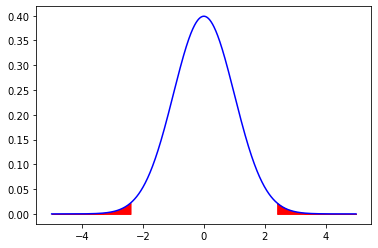

In [6]:
mean = 0
std = 1

# considerar uma distribuição ilustrativa que vai de -5 a 5
x_min = -5
x_max = 5

# gerar os dados para a distribuição
x = np.linspace(x_min, x_max, 1000)
y = scipy.stats.norm(mean,std).pdf(x)
plt.plot(x,y,'b')

# parte a preencher para o z = 2.409
z = 2.409

# se z < 0
x = np.linspace(x_min, -z, 1000)
y = scipy.stats.norm(mean,std).pdf(x)
plt.fill_between(x,y,color='r')

# se z > 0
# se z < 0
x = np.linspace(z, x_max, 1000)
y = scipy.stats.norm(mean,std).pdf(x)
plt.fill_between(x,y,color='r')

O **p-value** é a **área vermelha**! 

(Note como devemos considerar ambas as áreas!)

Para calcularmos o **p-value** podemos fazer:

In [7]:
from scipy.stats import norm

In [8]:
norm.sf(2.409)*2*100 # multiplicamos por 2 para considerar o +z e -z

1.5996297978338347

**E como interpretar o p-value?** 

Para isso, usamos um **nível de significância**, que em geral é tomado como $\alpha = 5\%$.

(Lembrando que a confiança é dada por $1-\alpha = 0.95$, neste caso)

Assim, 

> Se p-value $< \alpha$: **rejeitamos $H_0$**: os dados apresentam evidência convincente **a favor de $H_1$**;

> Se p-value $> \alpha$: **falhamos em rejeita $H_0$**: os dados NÃO apresentam evidência convincente **a favor de $H_1$**.
 
 
Como obtivemos um p-value de 1.6%, que é menor que 5%, podemos, com 5% de significância (ou seja, 95% de confiança!), **rejeitar** a hipótese nula! Ou seja, **os nossos dados fornecem** evidências suficientemente fortes em favor da alternativa!

Portanto, chegamos à conclusão que, **sim**, existe uma diferença entre as taxa de promoção de cada gênero! Ou seja, **sim**, há discriminação de gênero!

Com isso, você, head de RH, pode tomar uma decisão **estatisticamente segura**, e **apoiada pelos dados** de que, sim, uma campanha de combate à segregação de gênero é importante!

p-hacking (LINKAR)

_______

No geral, o framework de teste de hipótese é o seguinte:

> 1) Formule as hipóteses H_0 e H_1 em termos de um estimador pontual $PE$

$$H_0: PE = PE_0$$

$$H_1: PE (<, >, \neq) PE_0$$

> 2) Calcule o estimador pontual com base na amostra;

> 3) Cheque as condições para a aplicação do TCL;

> 4) Calcule alguma **estatística de teste**. Nos nossos exemplos, o **score padrão**:

$$ Z = \frac{PE - PE_0}{SE} $$

> 5) Calcule o p-value

> 6) Tome uma decisão:

- Se o p-value for MENOR que o nível de significância $\alpha$, **rejeitamos $H_0$**: os dados apresentam evidência convincente **a favor de $H_1$**;

- Se o p-value for MAIOR que o nível de significância $\alpha$, **falhamos em rejeita $H_0$**: os dados NÃO apresentam evidência convincente **a favor de $H_1$**;
    

_____

### Teste bicaudal vs unicaudal


<img src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png" weight=50%>

____________

### Bicaudal

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. 

Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. 

Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. 

**Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

In [2]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]
n = len(amostra)
n

50

In [3]:
import pandas as pd
df = pd.DataFrame({'Amostra': amostra})

df

,Amostra
0,509
1,505
2,495
3,510
4,496
5,509
6,497
7,502
8,503
9,505


### Passo 1 - Formulação das hipóteses $H_0$ e $H_1$

**Lembre-se, a hipótese nula sempre contém a alegação de igualdade!**

### $H_0: \mu = 500$

### $H_1: \mu \neq 500$

In [4]:
# Dados para a hipótese nula

mu = 500

### **Passo 2** - Cálculo do estimador pontual


In [5]:
# Média da amostra

media_amostra = df['Amostra'].mean()
media_amostra

503.24

In [6]:
desvio_amostra = df['Amostra'].std()
desvio_amostra

4.483803050527348

In [8]:
import numpy as np

# Erro padrão
SE = desvio_amostra/np.sqrt(n)
SE

0.6341055085065631

### Passo 3 - Check das condições do TCL

In [9]:
n >= 30

True

### Passo 4 - Calcule alguma estatística de teste

 


In [10]:
# média amostral, média populacional e erro-padrão
media_amostra, mu, SE

(503.24, 500, 0.6341055085065631)

In [11]:
z = (media_amostra - mu)/SE

In [12]:
z

5.109559775991876

### Passo 5 - Calcule o p-value


In [13]:
from scipy.stats import norm

In [14]:
p_value = norm.sf(z)*2 # multiplicamos por 2 porque podemos estar ou acima, ou abaixo, do z
p_value

3.2291031724457304e-07

### Passo 6 - Tome uma decisão

In [16]:
significancia = 0.05

if p_value > significancia:
    print("Não podemos rejeitar H_0")
else:
    print("Vamos rejeitar H_0")

Vamos rejeitar H_0


______

### Unicauldal

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, 37 gramas de açúcar. Ou seja, é alegado que a **quantidade média de açúcar em uma lata de refrigerante deve ser menor ou igual a 37 g.**

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatoriamente, em um conjunto de estabelecimentos distintos, uma amostra de 45 latas do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 45 latas de sua amostra. Os dados são exibidos abaixo.

Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?

Os testes unicaudais verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

In [17]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42,
           37.27, 36.42, 34.84, 34.60, 37.49,
           36.42, 36.29, 34.99, 36.64, 36.53,
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45,
           34.99, 36.55, 36.29, 36.06, 37.42,
           34.47, 36.70, 35.86, 36.80, 36.92,]
n = len(amostra)

n

45

In [18]:
df = pd.DataFrame({"Amostra": amostra})
df

,Amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49
5,36.53
6,35.49
7,36.90
8,34.52
9,37.30


### Passo 1 - Formulação das hipóteses $H_0$ e $H_1$

**Lembre-se, a hipótese nula sempre contém a alegação de igualdade!**

### $H_0: \mu \leq 37$

### $H_1: \mu > 37$

In [19]:
# hipótese nula:

mu = 37

### **Passo 2** - Cálculo do estimador pontual


In [21]:
media_amostra = df['Amostra'].mean()
media_amostra

36.217999999999996

In [22]:
desvio_amostra = df['Amostra'].std()
desvio_amostra

0.9403737168130161

In [23]:
SE = desvio_amostra/np.sqrt(n)
SE

0.14018263700320271

### Passo 3 - Check das condições do TCL

In [24]:
n > 30

True

### Passo 4 - Calcule alguma estatística de teste

 


In [25]:
media_amostra, mu, SE

(36.217999999999996, 37, 0.14018263700320271)

In [26]:
# cálculo do z-score
z = (media_amostra - mu)/SE
z

-5.578436935682252

### Passo 5 - Calcule o p-value


In [27]:
p_value = norm.sf(z)
p_value

0.9999999878655286

### Passo 6 - Tome uma decisão

In [28]:
significancia = 0.05

if p_value > significancia:
    print("Não podemos rejeitar a hipótese nula")
else:
    print("Rejeitamos a hipótese nula")

Não podemos rejeitar a hipótese nula


____

## 2) E se a amostra for pequena?

Ou seja, **o que muda se as condições para o TCL não forem válidas?**

Nesse caso, não podemos assumir que a distribuição amostral segue uma distribuição normal.

Assim, utilizar o **z-score**, tanto pra teste de hipótese, quanto pro cálculo de intervalos de confiança, não é justificável. 

Nestes casos, precisamos usar outras distribuições:


> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **TCL**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional não for desconhecido, deve-se utilizar a distribuição t de Student.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

## Student's t-distribution

A [distribuição t de Student](https://en.wikipedia.org/wiki/Student%27s_t-distribution) é uma distribuição simétrica e semelhante à curva normal padrão, porém com caudas mais largas, ou seja, uma simulação da t de Student pode **gerar valores mais extremos** que uma simulação da normal.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/325px-Student_t_pdf.svg.png">

onde $\nu$ é o número de **graus de liberdade**, comumente tomado como $n-1$ para nossos objetivos.

Note que para $\nu \rightarrow \infty$, recuperamos a distribuição normal!

Vamos ver na prática, como o uso da distribuição t funciona:

______

#### Voltando ao problema do refrigerante (unicaudal)

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, 37 gramas de açúcar. Ou seja, é alegado que a **quantidade média de açúcar em uma lata de refrigerante deve ser menor ou igual a 37 g.**

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatoriamente, em um conjunto de estabelecimentos distintos, uma amostra de **15** latas do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as **15** latas de sua amostra. Os dados são exibidos abaixo.

**Assumindo que essa população se distribua aproximadamente como uma normal** e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?

Os testes unicaudais verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

In [29]:
amostra = [37.27, 37.42, 36.84, 37.60, 37.49,  
           36.99, 36.95, 36.99, 37.26, 37.2,
           37.42, 36.99, 36.99, 37.64, 36.4]
n = len(amostra)
n

15

In [30]:
df = pd.DataFrame({"Amostra": amostra})
df

,Amostra
0,37.27
1,37.42
2,36.84
3,37.60
4,37.49
5,36.99
6,36.95
7,36.99
8,37.26
9,37.20


### Passo 1 - Formulação das hipóteses $H_0$ e $H_1$

**Lembre-se, a hipótese nula sempre contém a alegação de igualdade!**

### $H_0: \mu \leq 37$

### $H_1: \mu > 37$

In [31]:
# dados para a hipótese nula:
mu = 37

### **Passo 2** - Cálculo do estimador pontual


In [32]:
media_amostra = df["Amostra"].mean()
media_amostra

37.163333333333334

In [33]:
desvio_amostra = df["Amostra"].std()
desvio_amostra

0.33072791291475906

In [35]:
SE = desvio_amostra/np.sqrt(n)
SE

0.08539357992298657

### Passo 3 - Check das condições do TCL

In [36]:
n > 30

False

Nesse caso, vamos precisar usar a distribuição de t, se acreditarmos que a distribuição populacional é normal, o que assumimos ser verdadeiro (e é algo razoável).

### Passo 4 - Calcule alguma estatística de teste

 


In [37]:
media_amostra, mu, SE

(37.163333333333334, 37, 0.08539357992298657)

In [39]:
t_score = (media_amostra - mu)/SE
t_score

1.9127120970995537

In [40]:
nu = n - 1
nu

14

### Passo 5 - Calcule o p-value


Único ponto que muda é aqui:

In [41]:
from scipy.stats import norm

In [43]:
# Se fizéssemos da mesma forma que fizemos anteriormente
z_score = t_score

p_value = norm.sf(z_score)
p_value

0.02789245983570299

Decisão ERRADA, pq usa a distribuição incorreta pro tamanho amostral!!

In [44]:
from scipy.stats import t

In [45]:
# Também temos a "survival function" para a distribuição t de Student
p_value = t.sf(t_score, nu)
p_value

0.03823171195649509

### Passo 6 - Tome uma decisão

In [46]:
significancia = 0.05

if p_value > significancia:
    print("Não rejeitamos H0")
else:
    print("Rejeitamos H0")

Rejeitamos H0


Note que a única mudança foi no cálculo do p-value.

Se tivéssemos usado a mesma estatística de teste `t`, mas assumindo a distribuição normal, o valor encontrado do p-value seria:

In [47]:
norm.sf(z_score)

0.02789245983570299

In [48]:
t.sf(t_score, nu)

0.03823171195649509

_____

Vamos a mais um exemplo, olhando agora pro intervalo de confiança.

A única coisa que muda é o fator multiplicativo. Neste caso, teremos:

$$ \bar{x} \pm t_{n-1, \alpha/2} \frac{\sigma}{\sqrt{n}}$$

(Lembrando, que dentro da validade do TCL, tínhamos $ \bar{x} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$)

Então, a única coisa que muda é o cálculo do fator multiplicativo!

______

**Exemplo:** Se uma amostra aleatória n=250, tem uma média amostral de 51,3 e uma desvio padrão populacional de σ=2. Construa o intervalo com 95% de confiança para a média populacional μ.

Nesse caso, o TCL é válido, então seguimos como vimos na aula passada:

In [49]:
def calc_z_a2(conf):
    sig = 1 - conf
    
    return norm.ppf(conf + sig/2)

In [50]:
# Para o CI a 95 %:
calc_z_a2(0.95)

1.959963984540054

In [53]:
# cálculo do intervalo de confiança
def calc_ic_media(conf, media_amostral, sigma, n):
    # erro-padrão (standard error)
    SE = sigma/np.sqrt(n)
    
    # fator multiplicativo
    z_a2 = calc_z_a2(conf)
    
    # margem de erro
    ME = z_a2*SE
    
    IC_inf = round(media_amostral - ME, 2)
    IC_sup = round(media_amostral + ME, 2)
    
    return IC_inf, IC_sup

In [54]:
n = 250
media_amostral = 51.3
sigma = 2
conf = 0.95

calc_ic_media(conf, media_amostral, sigma, n)

(51.05, 51.55)

______

**Exemplo:** Se uma amostra aleatória n=25, tem uma média amostral de 51,3 e uma desvio padrão amostral de s=2. Assumindo que a distribuição populacional é normal, construa o intervalo com 95% de confiança para a média populacional μ.

Nesse caso, o TCL não é válido, então temos de usar a distribuição t para o cálculo do fator multiplicativo:

De forma ingenua, se não considerarmos as alterações necessárias, o intervalo de confiança fica MAIS ESTREITO, ou seja,  achamos que temos mais precisão do que de fato temos

In [55]:
n = 25
media_amostral = 51.3
sigma = 2
conf = 0.95

calc_ic_media(conf, media_amostral, sigma, n)

(50.52, 52.08)

Mas, o certo é corrigir o IC, levando em consideração uma distribuição amostral t de Student (não uma normal):

In [56]:
def calc_t_n_a2(conf, n):
    
    sig = 1 - conf
    
    return t.ppf(conf+sig/2, df = n-1)

In [57]:
# Cálculo do fator multiplicativo (t)
calc_t_n_a2(conf = 0.95, n =25)

2.0638985616280205

In [62]:
def calc_ic_media(conf, media_amostral, sigma, n):
    
    # Erro-padrão
    SE = sigma/np.sqrt(n)
    
    if n >= 30: # condições de aplicação do TLC
        
        z_a2 = calc_z_a2(conf)
        ME = z_a2*SE
    else: # não estamos nas condições do TLC
        
        t_n_a2 = calc_t_n_a2(conf,n)
        ME = t_n_a2*SE
    
    IC_inf = round(media_amostral - ME, 2)
    IC_sup = round(media_amostral + ME, 2)
    
    return IC_inf, IC_sup

In [63]:
n = 25
media_amostral = 51.3
sigma = 2
conf = 0.95

calc_ic_media(conf, media_amostral, sigma, n)

(50.47, 52.13)

In [64]:
n = 250
media_amostral = 51.3
sigma = 2
conf = 0.95

calc_ic_media(conf, media_amostral, sigma, n)

(51.05, 51.55)

________
_______
_______

### Testes de Hipótese - um resumo

O processo de inferência estatística é o processo de inferir alguma propriedade acerca de uma população de dados a partir de uma amostra desses dados. Nesse processo, existe a ocorrência de um **erro estatístico** que irá depender do tamanho da amostra em relação ao tamanho da população. 

 - **Exemplo 1:** com base nas respostas de 5000 pessoas, tentar inferir qual será o resultado de uma eleição.

 - **Exemplo 2:** com base no uso de 300 consumidores de uma loja, tentar inferir qual será o comportamento dos consumidores de uma loja ao longo de um ano.

__Hipótese estatística__

É uma suposição acerca do comportamento de uma população. Exemplos:

 - **Exemplo 1:** a altura média da população brasileira é de 1,70m.
 - **Exemplo 2:** a proporção da população paulista com asma é de 0.4%
 
__Testes de hipótese__

É uma regra para aceitar ou rejeitar uma hipótese estatística com base em uma amostra da população. Para realizar um teste de hipóteses, deve-se escolher um par de hipóteses **complementares**, isso é, se uma for falsa a outra necessariamente deve ser verdadeira e vice-versa. Essas hipóteses são chamadas de **hipótese nula**, simbolizado por $H_0$ e **hipótese alternativa**, simbolizada por $H_1$.

Dessa forma, existem duas decisões possíveis:
1. Rejeita-se $H_0$; ou
2. Falha-se em rejeitar $H_0$.

Com isso, pode-se acertar de duas formas ou errar de duas formas. 

<table>
    <th> </th>
    <th style=" border: 1px solid black">$H_0$ é verdadeira</th>
    <th style=" border: 1px solid black">$H_1$ é verdadeira</th>
    <tr style=" border: 1px solid black">
        <td style=" border: 1px solid black">$H_0$ decidido</td>
        <td style=" border: 1px solid black">Decisão correta</td>
        <td style=" border: 1px solid black">Erro do tipo II</td>
    </tr>
    <tr style=" border: 1px solid black">
        <td style=" border: 1px solid black">$H_1$ decidido</td>
        <td style=" border: 1px solid black">Erro do tipo I</td>
        <td style=" border: 1px solid black">Decisão correta</td>
    </tr>
</table>

Cada um desses erros, o erro do tipo I ou o do tipo II, poderá ser quantizado através de uma probabilidade de ocorrência; isso é, o erro do tipo I terá uma probabilidade $\alpha$ de ocorrer, e o erro do tipo II terá uma probabilidade $\beta$ de ocorrer.


<table>
    <th> </th>
    <th style=" border: 1px solid black">$H_0$ é verdadeira</th>
    <th style=" border: 1px solid black">$H_1$ é verdadeira</th>
    <tr style=" border: 1px solid black">
        <td style=" border: 1px solid black">$H_0$ decidido</td>
        <td style=" border: 1px solid black">probabilidade 1-$\alpha$</td>
        <td style=" border: 1px solid black">probabilidade $\beta$</td>
    </tr>
    <tr style=" border: 1px solid black">
        <td style=" border: 1px solid black">$H_1$ decidido</td>
        <td style=" border: 1px solid black">probabilidade $\alpha$</td>
        <td style=" border: 1px solid black">probabilidade $1-\beta$</td>
    </tr>
</table>